In [16]:
from sklearn.decomposition import PCA
import os
os.chdir('/home/nmduy/CA683/Credit Project')
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
data = pd.read_csv('data/encoded_train_dropna.csv')
data = data.drop(['SK_ID_CURR'], axis = 1)
X = data.drop('TARGET', axis = 1)

In [62]:
remove_ft = []
for col in list(X.columns):
    if X[col].sum() == 0 or X[col].sum() == len(X[col]):
        remove_ft += [col]
X = X.drop(remove_ft, axis=1)
len(remove_ft)

7

In [65]:
X.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,1,1.0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,0,0,0,0,0
1,0,1.0,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
2,1,1.0,0,1,0,99000.0,490495.5,27517.5,454500.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
3,1,0.0,1,1,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
4,1,1.0,1,1,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,...,0,0,0,0,0,0,0,0,0,0


In [63]:
processing_method = preprocessing.StandardScaler()
X_normalized = X.loc[:,:].values
X_normalized = processing_method.fit_transform(X_normalized)

In [64]:
X_normalized = pd.DataFrame(X_normalized,columns=X.columns)

In [66]:
pca = PCA(n_components=173)
principalComponents = pca.fit_transform(X_normalized)

In [67]:
pca_ratio = pca.explained_variance_ratio_

In [60]:
np.sum(pca_ratio[0:130])

0.8956776987155357

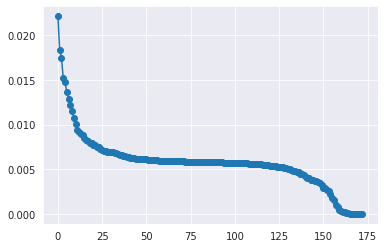

In [68]:
sns.set_style("darkgrid")
plt.plot(pca_ratio, 'o-')
plt.show()

In [53]:
pca = PCA(0.9)
pca.fit(X_normalized)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [55]:
pca.n_components_

131